In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import f_oneway
from scipy.stats import pearsonr
from scipy.stats import spearmanr

pd.options.display.max_columns = 30

TRAIN = pd.read_csv('data/train.csv')
TEST = pd.read_csv('data/test.csv')

TRAIN['log_target'] = np.log1p(TRAIN['transaction_real_price'])
TEST['log_target'] = np.log1p(TEST['transaction_real_price'])
FULL = pd.concat([TRAIN, TEST], axis = 0).reset_index(drop=True)

In [55]:
print("Train data shape : ", TRAIN.shape)
print("Test data shape : ", TEST.shape)

Train data shape :  (1601458, 26)
Test data shape :  (3918, 26)


In [56]:
pd.value_counts(TRAIN['city'])

1    1001372
0     600086
Name: city, dtype: int64

In [3]:
display(TRAIN.head(5))
display(TRAIN.tail(5))

,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,address_by_law,total_parking_capacity_in_site,total_household_count_in_sites,apartment_building_count_in_sites,tallest_building_in_sites,lowest_building_in_sites,heat_type,heat_fuel,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price,log_target
0,0,5584,1,200601,11~20,1999,47.43,6,37.585965,127.000231,1111017100,163.0,136,1,8.0,4.0,individual,gas,91120,65.63,46,1.0,1.0,corridor,215000000,19.186149
1,1,5584,1,200601,11~20,1999,44.37,8,37.585965,127.000231,1111017100,163.0,136,1,8.0,4.0,individual,gas,91119,61.39,10,2.0,1.0,corridor,200000000,19.113828
2,2,5059,1,200601,11~20,1992,54.70,8,37.580511,127.014016,1111017400,902.0,585,5,14.0,9.0,individual,gas,8430,72.36,201,2.0,1.0,corridor,168000000,18.939475
3,3,2816,1,200601,11~20,1993,64.66,11,37.580324,127.011788,1111017400,902.0,919,7,15.0,11.0,individual,gas,5839,87.30,284,2.0,1.0,corridor,165000000,18.921456
4,4,2816,1,200601,11~20,1993,106.62,7,37.580324,127.011788,1111017400,902.0,919,7,15.0,11.0,individual,gas,5836,127.74,112,4.0,2.0,stairway,280000000,19.450300


,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,address_by_law,total_parking_capacity_in_site,total_household_count_in_sites,apartment_building_count_in_sites,tallest_building_in_sites,lowest_building_in_sites,heat_type,heat_fuel,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price,log_target
1601453,1605344,11500,0,201810,21~31,1999,118.4700,14,35.155572,129.017479,2623011100,876.0,819,8,27.0,13.0,individual,gas,44386,143.45,108,4.0,2.0,stairway,427000000,19.872295
1601454,1605346,16686,1,201810,21~31,2007,59.9900,4,37.502392,126.942033,1159010200,1651.0,1122,22,15.0,8.0,individual,gas,13884,79.98,254,3.0,2.0,stairway,771000000,20.463199
1601455,1605356,22243,0,201810,21~31,2014,84.9669,31,35.064801,128.983131,2638010600,1761.0,1326,9,35.0,27.0,individual,gas,56043,109.77,209,3.0,2.0,stairway,343000000,19.653241
1601456,1605366,3686,1,201810,21~31,1996,59.3400,4,37.555215,127.131294,1174010700,111.0,107,1,19.0,11.0,individual,gas,165820,88.37,4,3.0,1.0,corridor,485000000,19.999659
1601457,1605373,2937,1,201810,21~31,1999,84.8800,5,37.604326,127.017168,1129013300,802.0,860,8,22.0,7.0,individual,gas,6279,108.75,209,3.0,2.0,stairway,430000000,19.879296


In [4]:
TRAIN[TRAIN['transaction_real_price'] < 50000000]

,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,address_by_law,total_parking_capacity_in_site,total_household_count_in_sites,apartment_building_count_in_sites,tallest_building_in_sites,lowest_building_in_sites,heat_type,heat_fuel,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price,log_target
1994,1994,35014,0,200601,11~20,1993,49.940,1,35.085201,129.065994,2620012100,1418.0,4056,26,15.0,15.0,individual,gas,145735,68.73,990,2.0,1.0,corridor,39500000,17.491811
2105,2105,9254,0,200601,11~20,1989,55.600,2,35.114988,129.107997,2629010700,NaN,288,4,6.0,6.0,individual,gas,40090,66.26,50,3.0,1.0,stairway,44500000,17.611000
2120,2120,7930,0,200601,11~20,1994,42.660,12,35.263721,129.020364,2632010100,551.0,1484,14,15.0,12.0,individual,gas,37373,58.91,54,2.0,1.0,corridor,45000000,17.622173
2121,2121,7930,0,200601,11~20,1994,41.850,4,35.263721,129.020364,2632010100,551.0,1484,14,15.0,12.0,individual,gas,37372,57.11,836,2.0,1.0,corridor,45000000,17.622173
2126,2126,7930,0,200601,11~20,1994,41.850,9,35.263721,129.020364,2632010100,551.0,1484,14,15.0,12.0,individual,gas,37372,57.11,836,2.0,1.0,corridor,37000000,17.426428
2155,2155,5934,0,200601,11~20,1991,36.340,9,35.206414,129.012592,2632010400,1600.0,1320,10,15.0,15.0,individual,gas,34258,52.81,30,2.0,1.0,corridor,44000000,17.599700
2160,2160,16302,0,200601,11~20,1990,59.930,4,35.234238,129.150667,2635010100,NaN,180,3,6.0,6.0,individual,-,48750,71.50,144,2.0,1.0,stairway,39000000,17.479072
2164,2164,7940,0,200601,11~20,1980,40.130,3,35.194056,129.126132,2635010400,84.0,700,16,5.0,5.0,individual,gas,147743,45.92,699,2.0,1.0,stairway,44500000,17.611000
2165,2165,7940,0,200601,11~20,1980,40.130,3,35.194056,129.126132,2635010400,84.0,700,16,5.0,5.0,individual,gas,147744,45.96,1,2.0,1.0,stairway,44500000,17.611000
2166,2166,7925,0,200601,11~20,1987,50.190,4,35.191430,129.123780,2635010400,110.0,175,3,5.0,5.0,individual,gas,37351,59.98,15,2.0,1.0,stairway,48500000,17.697074


In [5]:
display(TEST.head(5))
display(TEST.tail(5))

,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,address_by_law,total_parking_capacity_in_site,total_household_count_in_sites,apartment_building_count_in_sites,tallest_building_in_sites,lowest_building_in_sites,heat_type,heat_fuel,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price,log_target
0,462533,3751,1,200912,21~31,1984,83.58,14,37.519926,127.052515,1168010400,375.0,375,4,15.0,15.0,district,cogeneration,6648,107.19,2,3.0,1.0,corridor,0,0.0
1,764018,14029,1,201304,1~10,1968,107.17,10,37.572215,126.987643,1111013700,NaN,149,1,15.0,8.0,individual,gas,46184,107.17,10,0.0,0.0,corridor,0,0.0
2,813528,12304,1,201309,21~30,1968,36.17,6,37.570067,127.010640,1111017400,NaN,120,4,5.0,4.0,individual,gas,45540,39.66,58,2.0,1.0,stairway,0,0.0
3,845097,22241,1,201312,1~10,2007,45.67,8,37.556938,126.859255,1150010200,216.0,419,1,15.0,15.0,individual,gas,19069,87.11,1,3.0,2.0,stairway,0,0.0
4,856338,316,1,201401,1~10,1988,41.85,4,37.652256,127.082003,1135010600,NaN,210,2,5.0,5.0,individual,gas,704,56.70,90,2.0,1.0,stairway,0,0.0


,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,address_by_law,total_parking_capacity_in_site,total_household_count_in_sites,apartment_building_count_in_sites,tallest_building_in_sites,lowest_building_in_sites,heat_type,heat_fuel,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price,log_target
3913,1605370,2871,1,201810,21~31,1987,31.9800,4,37.652529,127.064082,1135010500,NaN,840,19,5.0,5.0,individual,gas,6038,37.38,840,1.0,1.0,stairway,0,0.0
3914,1605371,6002,1,201810,21~31,2004,84.8900,25,37.621150,127.010829,1130510100,1875.0,2075,21,25.0,5.0,individual,gas,9468,102.49,648,3.0,2.0,stairway,0,0.0
3915,1605372,7116,1,201810,21~31,1994,57.4600,15,37.643436,127.017889,1130510300,130.0,146,1,15.0,12.0,individual,gas,35853,71.47,29,3.0,1.0,stairway,0,0.0
3916,1605374,2937,1,201810,21~31,1999,84.8800,5,37.604326,127.017168,1129013300,802.0,860,8,22.0,7.0,individual,gas,6280,108.75,0,3.0,2.0,stairway,0,0.0
3917,1605375,20307,0,201810,21~31,2011,84.7808,4,35.338713,129.163924,2671025627,1128.0,978,13,20.0,18.0,district,cogeneration,54538,105.99,430,3.0,2.0,stairway,0,0.0


In [6]:
TEST['transaction_real_price'].nunique()

1

In [7]:
TRAIN.shape[0] + TEST.shape[0]

1605376

1. TEST set 역시 **`transaction_real_price`** 열을 갖고 있지만, 모두 0 값을 갖고 있다.<br/>
2. TRAIN 데이터 개수와 TEST 데이터 개수를 합친 값이 1605376이다. key값이 0 ~ 160575인 것과 연결지으면, 데이터는 원래 하나의 큰 set이었고, 여기서 테스트셋만 쏙쏙 샘플링 했다는 것을 알 수 있다.<br/>
3. TEST set 은 0번 째 raw 제외하고 2013년 이후 데이터에서 랜덤하게 뽑히다가, 최근 데이터에 대해서는 더 많이 샘플링되어있다. 테스트셋에는 2018년 10월 거래는 순차적으로 대부분이 있고, 2018년 9월로 갈 수록 그 빈도가 적어지고 있다.<br/>
4. shuffle 되지 않은 데이터로 보이고, 테스테 셋이 최신 데이터가 많은 만큼 TRAIN SET 전체를 썼을 때 더 안 좋아질 수도 있을 것 같다<br/>

In [8]:
FULL = pd.concat([TRAIN, TEST], axis = 0)

**duplicated row**

In [9]:
TRAIN[TRAIN.duplicated(TRAIN.columns.difference(['key']))]

,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,address_by_law,total_parking_capacity_in_site,total_household_count_in_sites,apartment_building_count_in_sites,tallest_building_in_sites,lowest_building_in_sites,heat_type,heat_fuel,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price,log_target
234,234,12037,1,200601,11~20,2005,84.9700,1,37.568529,127.071547,1123010600,237.0,193,3,15.0,10.0,individual,gas,45259,107.09,152,3.0,2.0,stairway,274700000,19.431190
236,236,12037,1,200601,11~20,2005,84.9700,1,37.568529,127.071547,1123010600,237.0,193,3,15.0,10.0,individual,gas,45259,107.09,152,3.0,2.0,stairway,274700000,19.431190
593,593,2894,1,200601,11~20,1992,44.5200,5,37.628568,127.052365,1135010200,1402.0,2002,16,15.0,15.0,individual,gas,6126,59.20,540,2.0,1.0,corridor,70000000,18.064006
730,730,2871,1,200601,11~20,1987,31.9800,5,37.652529,127.064082,1135010500,NaN,840,19,5.0,5.0,individual,gas,6038,37.38,840,1.0,1.0,stairway,123000000,18.627695
1240,1240,754,1,200601,11~20,1993,59.8500,9,37.475101,126.932481,1162010200,2124.0,1634,12,15.0,10.0,central,gas,2012,76.70,269,2.0,1.0,corridor,175000000,18.980297
1480,1480,645,1,200601,11~20,1994,84.3200,8,37.509570,126.926170,1159010800,464.0,487,3,26.0,15.0,individual,gas,146723,103.08,487,3.0,2.0,stairway,363000000,19.709913
1509,1509,1061,1,200601,11~20,1982,42.5500,3,37.486331,127.073169,1168010300,1136.0,2841,58,5.0,5.0,individual,gas,2885,42.55,1580,2.0,1.0,stairway,550000000,20.125429
1641,1641,1891,1,200601,11~20,1983,54.8100,14,37.552700,127.148545,1174010100,2300.0,2400,18,16.0,12.0,central,gas,4184,76.44,495,3.0,1.0,corridor,330000000,19.614603
1686,1686,1027,1,200601,11~20,1980,58.0800,1,37.527077,127.138797,1174010600,959.0,1372,47,5.0,5.0,central,gas,2736,58.08,200,3.0,1.0,stairway,540000000,20.107080
1822,1822,1316,1,200601,11~20,1987,137.4700,1,37.499101,127.000887,1165010700,538.0,414,4,12.0,8.0,district,cogeneration,3577,161.31,72,4.0,2.0,stairway,770000000,20.461901


In [10]:
TRAIN = TRAIN.drop_duplicates(TRAIN.columns.difference(['key']))

**remove constant features**

In [11]:
display(TRAIN.nunique(dropna = False))

key                                   1554911
apartment_id                             3906
city                                        2
transaction_year_month                    154
transaction_date                            6
year_of_completion                         53
exclusive_use_area                       9010
floor                                      84
latitude                                 3905
longitude                                3898
address_by_law                            377
total_parking_capacity_in_site           1263
total_household_count_in_sites           1155
apartment_building_count_in_sites          56
tallest_building_in_sites                  58
lowest_building_in_sites                   53
heat_type                                   4
heat_fuel                                   4
room_id                                 19541
supply_area                              9490
total_household_count_of_area_type        756
room_count                        

In [12]:
display(TEST.nunique(dropna = False))

key                                   3918
apartment_id                          3918
city                                     2
transaction_year_month                  31
transaction_date                         5
year_of_completion                      52
exclusive_use_area                    2112
floor                                   47
latitude                              3917
longitude                             3910
address_by_law                         379
total_parking_capacity_in_site        1264
total_household_count_in_sites        1155
apartment_building_count_in_sites       56
tallest_building_in_sites               58
lowest_building_in_sites                53
heat_type                                4
heat_fuel                                4
room_id                               3918
supply_area                           2970
total_household_count_of_area_type     570
room_count                               8
bathroom_count                           6
front_door_

1. There is no constant feautre.<br>
2. 예측해야할 **`apartment_id`** 가 더 많고, 또 다 다르다.<br/>
3. 그 외 숫자로만 봤을 때, train set에 등장하지 않은 수가 test set에 등장하는 경우는 없는 것 같다.<br/>

**remove duplicated column** <br/>
**`heat_type`** 와 **`heat_fuel`** 만 비교해보면 됨<br/>
데이터 설명 테이블에는 **`heat_type`** 은 3개 class, **`heat_fuel`** 은 2개 calss가 있다고 명시되어 있으나 NaN 포함 4개씩이 발견돰<br/>

In [13]:
display(pd.value_counts(TRAIN['heat_type'], dropna=False))
display(pd.value_counts(TRAIN['heat_fuel'], dropna=False))

individual    1048302
district       371669
central        132941
NaN              1999
Name: heat_type, dtype: int64

gas             1165869
cogeneration     370460
NaN                9636
-                  8946
Name: heat_fuel, dtype: int64

**Missing Value**

In [14]:
TRAIN.isnull().sum()

key                                       0
apartment_id                              0
city                                      0
transaction_year_month                    0
transaction_date                          0
year_of_completion                        0
exclusive_use_area                        0
floor                                     0
latitude                                  0
longitude                                 0
address_by_law                            0
total_parking_capacity_in_site        91123
total_household_count_in_sites            0
apartment_building_count_in_sites         0
tallest_building_in_sites                 8
lowest_building_in_sites                  8
heat_type                              1999
heat_fuel                              9636
room_id                                   0
supply_area                               0
total_household_count_of_area_type        0
room_count                              688
bathroom_count                  

In [15]:
TEST.isnull().sum()

key                                     0
apartment_id                            0
city                                    0
transaction_year_month                  0
transaction_date                        0
year_of_completion                      0
exclusive_use_area                      0
floor                                   0
latitude                                0
longitude                               0
address_by_law                          0
total_parking_capacity_in_site        371
total_household_count_in_sites          0
apartment_building_count_in_sites       0
tallest_building_in_sites               1
lowest_building_in_sites                1
heat_type                              28
heat_fuel                              48
room_id                                 0
supply_area                             0
total_household_count_of_area_type      0
room_count                              5
bathroom_count                          5
front_door_structure              

1. missing value 가 같은 아파트에서 나온다는 증거를 찾아낼 수 있다면, **`isNA feature`** 를 생성하면 좋을 것 같다.<br/>
2. 주로 명목형 변수이므로 채워넣지 않고 위 방법으로 진행하여 tree based model을 사용해도 무관할 것 같음<br/>
3. 실제 검색으로 아파트 정보를 찾아낼 수 있다면 찾아내는 것도 한 가지 방법<br/>

**NaN 탐색**<br/>

In [16]:
# TRAIN.fillna(-999, inplace = True)
na = TRAIN[TRAIN['total_parking_capacity_in_site'].isnull()]
na

,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,address_by_law,total_parking_capacity_in_site,total_household_count_in_sites,apartment_building_count_in_sites,tallest_building_in_sites,lowest_building_in_sites,heat_type,heat_fuel,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price,log_target
54,54,2491,1,200601,11~20,1988,59.910,7,37.534389,127.074220,1121510500,NaN,656,6,15.0,13.0,individual,gas,147040,78.63,204,2.0,1.0,corridor,245000000,19.316769
59,59,2491,1,200601,11~20,1988,59.910,12,37.534389,127.074220,1121510500,NaN,656,6,15.0,13.0,individual,gas,147040,78.63,204,2.0,1.0,corridor,250000000,19.336971
67,67,484,1,200601,11~20,1977,86.120,4,37.532796,126.950925,1117011800,NaN,554,6,12.0,1.0,district,cogeneration,1266,112.40,120,4.0,1.0,corridor,470000000,19.968243
73,73,4400,1,200601,11~20,1987,112.410,1,37.541535,126.957337,1117011900,NaN,120,4,6.0,4.0,individual,gas,31664,140.50,17,3.0,1.0,stairway,350000000,19.673444
121,121,733,1,200601,11~20,1984,166.980,13,37.518098,126.987503,1117013300,NaN,1326,15,13.0,13.0,district,cogeneration,1970,179.86,336,4.0,2.0,stairway,1370000000,21.038077
122,122,733,1,200601,11~20,1984,166.980,12,37.518098,126.987503,1117013300,NaN,1326,15,13.0,13.0,district,cogeneration,1970,179.86,336,4.0,2.0,stairway,1450000000,21.094829
256,256,1326,1,200601,11~20,1992,84.670,5,37.626693,127.041085,1130510200,NaN,261,3,15.0,10.0,individual,gas,146868,100.12,261,3.0,2.0,stairway,150000000,18.826146
263,263,1326,1,200601,11~20,1992,84.670,14,37.626693,127.041085,1130510200,NaN,261,3,15.0,10.0,individual,gas,146868,100.12,261,3.0,2.0,stairway,150000000,18.826146
324,324,734,1,200601,11~20,1990,52.710,11,37.596986,126.923484,1138010700,NaN,206,2,13.0,11.0,individual,gas,1974,70.81,206,2.0,1.0,corridor,105000000,18.469471
332,332,120,1,200601,11~20,1996,84.900,4,37.651601,127.027496,1132010500,NaN,315,4,12.0,7.0,individual,gas,296,107.34,208,3.0,2.0,stairway,174000000,18.974566


In [17]:
na_count = pd.value_counts(na['apartment_id'])
na_count

11181    5690
7772     4599
2811     2550
1337     2315
5716     1640
3703     1540
595      1540
5285     1274
186      1207
9260     1139
4148     1125
7727     1105
559      1005
3579      935
1510      841
3577      799
694       799
1584      779
6079      746
1159      744
3569      719
598       709
1122      707
2874      702
2871      681
5722      671
27021     643
1555      634
3882      603
1289      596
         ... 
1293       59
27033      59
12480      59
27023      59
16518      58
12115      58
9937       57
9334       56
7180       55
1356       55
14140      54
16546      52
15181      52
1301       51
16980      48
24203      48
4374       46
24201      46
4400       44
13668      43
4497       43
4281       40
9451       40
14029      38
1299       33
16725      22
12304      19
17949      13
36900       8
316         1
Name: apartment_id, Length: 370, dtype: int64

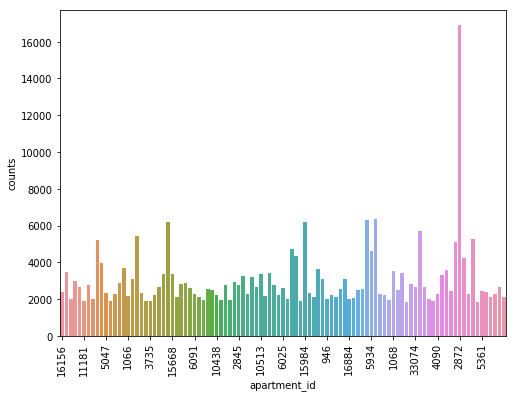

In [43]:
train_count = pd.value_counts(TRAIN['apartment_id']).reset_index()
train_count.columns = ['apartment_id', 'counts']
train_count = train_count[train_count['counts'] > 100] 

plt.figure(figsize = (8,6))
sns.barplot(x = 'apartment_id', y = 'counts', data = train_count.loc[0:100,:])
plt.xticks(np.arange(0,100, 5), train_count.loc[np.arange(0,100,5) ,'apartment_id'],  rotation = 'vertical')
plt.show()

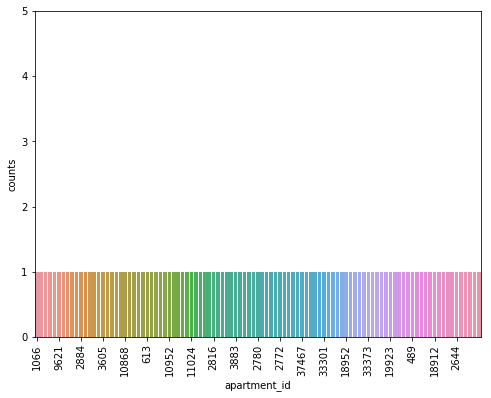

In [50]:
test_count = pd.value_counts(TEST['apartment_id']).reset_index()
test_count.columns = ['apartment_id', 'counts']

plt.figure(figsize = (8,6))
sns.barplot(x = 'apartment_id', y = 'counts', data = test_count.loc[0:100,:])
plt.xticks(np.arange(0,100, 5), test_count.loc[np.arange(0,100,5) ,'apartment_id'],  rotation = 'vertical')
plt.ylim(0, 5)
plt.show()

In [19]:
(na_count == train_count[pd.value_counts(na['apartment_id']).index]).sum()

370

**`total_parking_capacity_in_site`** 의 NA 값은 특정 아파트에서만 발생. 반대로 해당 아파트의 모든 **`total_parking_capacity_in_site`** 값은 NA.<br/>
따라서 값을 예측해서 넣는 것보단, -999 값으로 넣고 isNA feature를 생성하여 tree model 사용하는 것이 좋아보임

In [20]:
y = TRAIN['transaction_real_price']

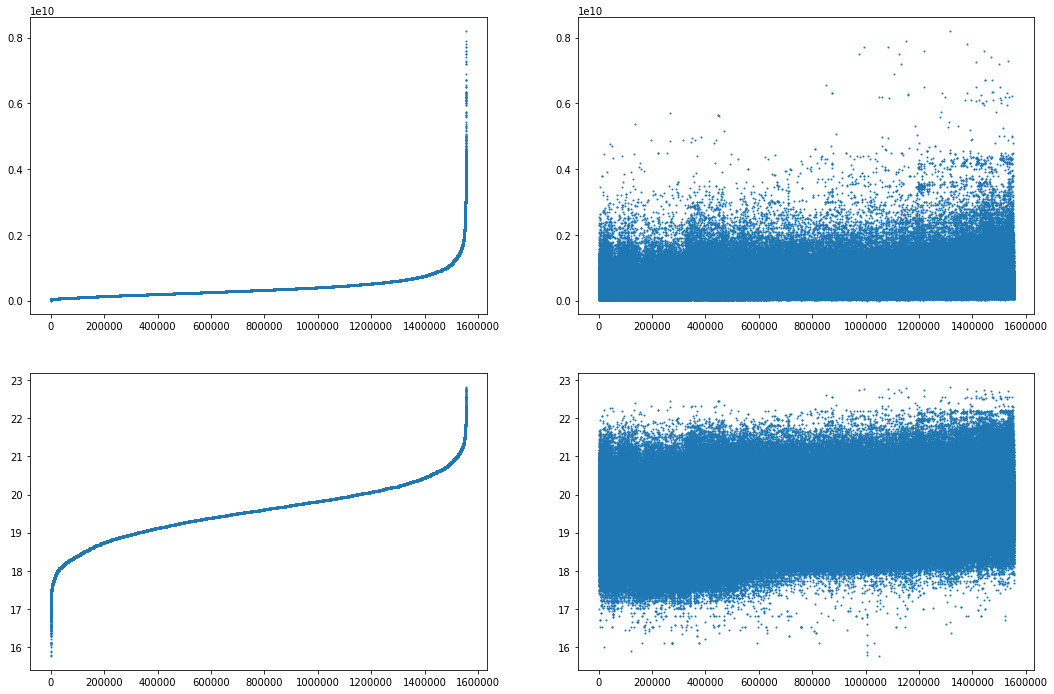

In [21]:
plt.figure(figsize = (18,12))
plt.subplot(221)
plt.plot(range(TRAIN.shape[0]), y.sort_values(), 'o', markersize = 1)

plt.subplot(222)
plt.plot(range(TRAIN.shape[0]), y, 'o', markersize = 1)

plt.subplot(223)
plt.plot(range(TRAIN.shape[0]), np.log1p(y.sort_values()), 'o', markersize = 1)

plt.subplot(224)
plt.plot(range(TRAIN.shape[0]), np.log1p(y), 'o', markersize = 1)
plt.show()

C:\ProgramData\Anaconda3\envs\venv\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\envs\venv\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


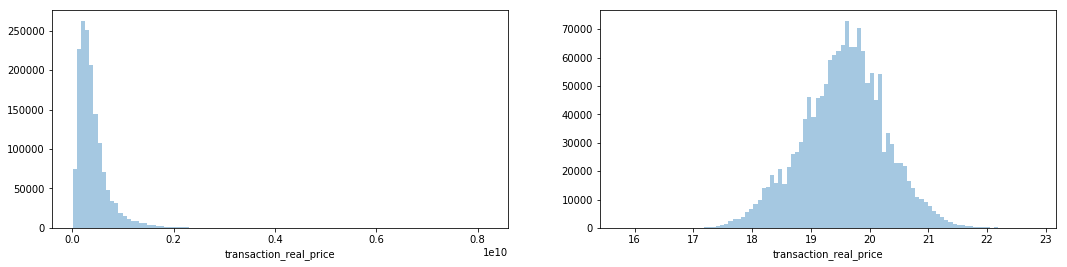

In [22]:
plt.figure(figsize = (18,4))

plt.subplot(121)
sns.distplot(y, bins = 100, kde= False)

plt.subplot(122)
sns.distplot(np.log1p(y), bins = 100, kde= False)

plt.show()

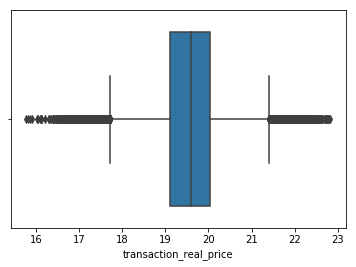

In [23]:
plt.figure()
sns.boxplot(x=np.log1p(y))
plt.show()

In [24]:
mean = np.log1p(y).mean()
sigma = np.log1p(y).std()
len(y[(np.log1p(y).values > mean + 3*sigma) | (np.log1p(y).values < mean - 3*sigma)])/len(y)

0.0023769849206803475

In [25]:
corr = TRAIN.corr()
corr

,key,apartment_id,city,transaction_year_month,year_of_completion,exclusive_use_area,floor,latitude,longitude,address_by_law,total_parking_capacity_in_site,total_household_count_in_sites,apartment_building_count_in_sites,tallest_building_in_sites,lowest_building_in_sites,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,transaction_real_price,log_target
key,1.000000,0.198625,0.087683,0.991292,0.163196,0.066333,0.020262,0.086415,-0.088653,-0.087061,0.069367,0.038393,0.060686,0.053100,0.005057,0.009964,0.076292,-0.036884,0.052818,0.108367,0.291466,0.372649
apartment_id,0.198625,1.000000,-0.163884,0.198666,0.637046,0.148766,0.092710,-0.164616,0.159988,0.164761,0.139524,0.028865,0.093405,0.231042,0.124040,0.243406,0.189234,-0.171854,0.103670,0.347206,0.160762,0.142499
city,0.087683,-0.163884,1.000000,0.081552,-0.054868,-0.067036,-0.110882,0.998733,-0.996560,-0.999766,0.068344,0.119143,0.145875,-0.196909,-0.263658,-0.286431,-0.063207,0.026229,-0.063763,-0.043555,0.417112,0.551831
transaction_year_month,0.991292,0.198666,0.081552,1.000000,0.164403,0.068649,0.021218,0.080214,-0.082566,-0.080889,0.071475,0.038742,0.061811,0.054911,0.007744,0.010133,0.078470,-0.036899,0.054310,0.110110,0.280941,0.368476
year_of_completion,0.163196,0.637046,-0.054868,0.164403,1.000000,0.224308,0.246501,-0.055585,0.049157,0.054068,0.168727,0.012498,0.047143,0.529650,0.265563,0.133872,0.304390,-0.123982,0.223360,0.515200,0.126989,0.228948
exclusive_use_area,0.066333,0.148766,-0.067036,0.068649,0.224308,1.000000,0.128960,-0.072909,0.067138,0.068192,0.116608,-0.033890,0.023673,0.255764,0.187728,0.033410,0.983352,-0.153976,0.767670,0.643480,0.513389,0.525849
floor,0.020262,0.092710,-0.110882,0.021218,0.246501,0.128960,1.000000,-0.112914,0.114658,0.110620,0.171066,0.103012,0.026172,0.494251,0.395751,0.094099,0.169862,0.032260,0.085555,0.141242,0.109401,0.109168
latitude,0.086415,-0.164616,0.998733,0.080214,-0.055585,-0.072909,-0.112914,1.000000,-0.993961,-0.998922,0.064538,0.117851,0.142463,-0.200826,-0.266968,-0.288245,-0.068665,0.026337,-0.068919,-0.046220,0.403543,0.539826
longitude,-0.088653,0.159988,-0.996560,-0.082566,0.049157,0.067138,0.114658,-0.993961,1.000000,0.996352,-0.056812,-0.108070,-0.138025,0.204700,0.271096,0.280711,0.063465,-0.023790,0.062421,0.040763,-0.407507,-0.542832
address_by_law,-0.087061,0.164761,-0.999766,-0.080889,0.054068,0.068192,0.110620,-0.998922,0.996352,1.000000,-0.065152,-0.116614,-0.142348,0.196477,0.264037,0.286641,0.064205,-0.025909,0.064572,0.043793,-0.411765,-0.547521


In [26]:
TRAIN.fillna(-999, inplace = True)
TEST.fillna(-999, inplace = True)

In [27]:
train_id = TRAIN.drop_duplicates(subset = 'apartment_id')['apartment_id'].sort_values().values
test_id = TEST.drop_duplicates(subset = 'apartment_id')['apartment_id'].sort_values().values
display(train_id)
display(test_id)

array([    3,     4,     5, ..., 38654, 50075, 50264], dtype=int64)

array([    3,     4,     5, ..., 38654, 50075, 50264], dtype=int64)

**train set과 test set의 apartment_id 비교**

In [28]:
def in_a_but_not_in_b(a, b):
    ret = []
    for item_a in a:
        if item_a not in b:
            ret.append(item_a)
            
    return ret

In [29]:
in_a_but_not_in_b(train_id, test_id)

[]

In [30]:
in_a_but_not_in_b(test_id, train_id)

[22247,
 26553,
 33373,
 36224,
 36841,
 37086,
 37180,
 37297,
 37353,
 37354,
 37431,
 38465]

In [31]:
TEST[TEST['apartment_id'].isin(in_a_but_not_in_b(test_id, train_id))]

,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,address_by_law,total_parking_capacity_in_site,total_household_count_in_sites,apartment_building_count_in_sites,tallest_building_in_sites,lowest_building_in_sites,heat_type,heat_fuel,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price,log_target
13,1389544,26553,0,201704,11~20,1984,64.5200,3,35.146249,129.008208,2653010600,-999.0,110,2,5.0,5.0,individual,-,58482,71.72,20,3.0,1.0,stairway,0,0.0
54,1499565,37086,0,201712,11~20,2017,64.7547,14,35.174505,129.090579,2647010200,0.0,158,1,27.0,27.0,-999,-999,152701,84.47,89,3.0,2.0,stairway,0,0.0
59,1503614,22247,1,201712,1~10,2011,59.9700,11,37.554659,126.746463,2824510900,413.0,376,8,15.0,10.0,individual,gas,21243,80.09,85,3.0,2.0,stairway,0,0.0
114,1536408,37354,1,201802,21~28,2018,59.9800,2,37.554646,127.022766,1120010900,1547.0,1330,17,21.0,8.0,individual,gas,154032,86.89,268,3.0,2.0,stairway,0,0.0
223,1555662,37180,1,201804,21~30,2017,84.7500,4,37.517017,126.887009,1156012300,251.0,222,4,18.0,16.0,individual,gas,153101,111.42,130,3.0,2.0,stairway,0,0.0
254,1560160,33373,1,201805,1~10,2016,74.9700,9,37.506190,126.834660,1147010100,531.0,560,7,20.0,14.0,district,cogeneration,92068,110.37,68,3.0,2.0,stairway,0,0.0
327,1565893,37431,1,201806,1~10,2018,59.9200,11,37.639865,126.919788,1138011400,331.0,142,2,20.0,20.0,district,cogeneration,154467,88.56,60,3.0,2.0,stairway,0,0.0
1460,1596817,36224,1,201808,21~31,2016,84.8984,5,37.474976,127.142807,1171010900,298.0,148,2,19.0,19.0,-999,-999,150117,112.23,17,3.0,2.0,stairway,0,0.0
2682,1603034,36841,1,201809,1~10,2017,45.8790,13,37.571644,126.961380,1111018000,222.0,182,3,19.0,9.0,-999,-999,152279,67.94,75,2.0,1.0,stairway,0,0.0
2846,1603424,37353,1,201809,1~10,2018,101.4632,7,37.505534,127.139817,1171011200,400.0,220,3,20.0,20.0,individual,gas,154465,130.04,220,3.0,2.0,stairway,0,0.0


이상 train에는 없지만 test에 있는 **`apartment_id`** 목록

# Validation Set 만들자!!
## 테스트셋 분포 탐색

In [32]:
count = pd.value_counts(TEST['transaction_year_month']).reset_index(drop = False)
count.columns = ['period', 'count']
count = count.sort_values(by = 'period').reset_index(drop = True)
count['fraction'] = count['count'] / count.sum()['count']
count

,period,count,fraction
0,200912,1,0.000255
1,201304,1,0.000255
2,201309,1,0.000255
3,201312,1,0.000255
4,201401,1,0.000255
5,201411,1,0.000255
6,201503,1,0.000255
7,201510,1,0.000255
8,201603,2,0.000510
9,201606,1,0.000255


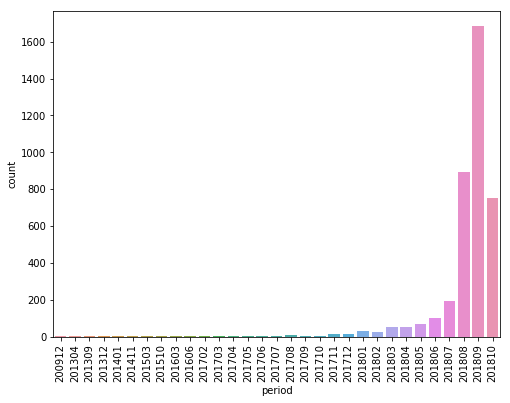

In [33]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'period', y = 'count', data = count)
plt.xticks(rotation = 'vertical')
plt.show()

In [34]:
count = pd.value_counts(TEST['transaction_year_month'].astype('str').map(lambda x: x[0:4])).reset_index(drop = False)
count.columns = ['period', 'count']
count = count.sort_values(by = 'period').reset_index(drop = True)
count['fraction'] = count['count'] / count.sum()['count']
count

,period,count,fraction
0,2009,1,0.000255
1,2013,3,0.000766
2,2014,2,0.000510
3,2015,2,0.000510
4,2016,3,0.000766
5,2017,51,0.013017
6,2018,3856,0.984176


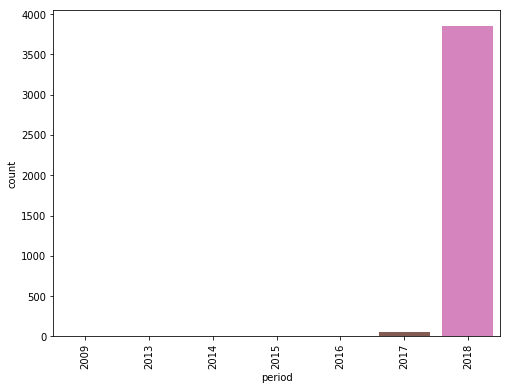

In [35]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'period', y = 'count', data = count)
plt.xticks(rotation = 'vertical')
plt.show()

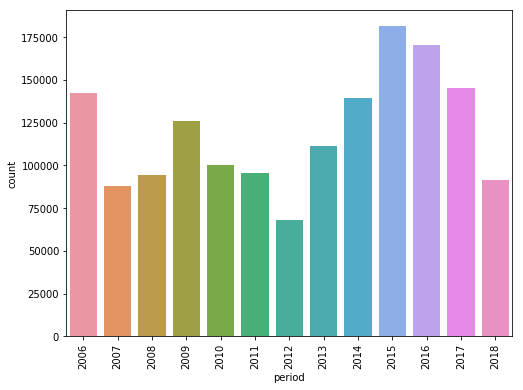

In [52]:
TRAIN['transaction_year'] = TRAIN['transaction_year_month'].astype(str).map(lambda x: int(x[0:4]))

count = pd.value_counts(TRAIN['transaction_year']).reset_index(drop = False)
count.columns = ['period', 'count']
count = count.sort_values(by = 'period').reset_index(drop = True)
count['fraction'] = count['count'] / count.sum()['count']


plt.figure(figsize = (8,6))
sns.barplot(x = 'period', y = 'count', data = count)
plt.xticks( rotation = 'vertical')
plt.show()

In [46]:
count.loc[np.arange(0,count.shape[0],5), 'period'].shape

(31,)

In [49]:
count.shape

(154, 3)

2017년 이하는 버리고 2018년에 집중해도될듯 <br/>
**그렇다면 2018년 월별 변화는 어떠한가**

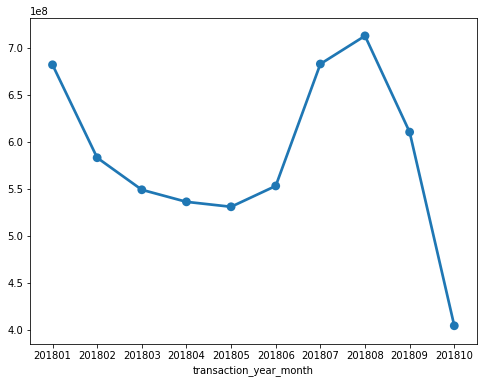

In [35]:
temp = TRAIN[TRAIN['transaction_year_month'] > 201800]
temp = temp.groupby(by = 'transaction_year_month')
temp = temp.agg('mean')['transaction_real_price']

plt.figure(figsize = (8,6))
sns.pointplot(x = temp.index, y = temp.values)
plt.show()

In [36]:
f_oneway(TRAIN[TRAIN['transaction_year_month'] == 201801]['transaction_real_price'].values,
         TRAIN[TRAIN['transaction_year_month'] == 201802]['transaction_real_price'].values,
         TRAIN[TRAIN['transaction_year_month'] == 201803]['transaction_real_price'].values,
         TRAIN[TRAIN['transaction_year_month'] == 201804]['transaction_real_price'].values,
         TRAIN[TRAIN['transaction_year_month'] == 201805]['transaction_real_price'].values,
         TRAIN[TRAIN['transaction_year_month'] == 201806]['transaction_real_price'].values,
         TRAIN[TRAIN['transaction_year_month'] == 201807]['transaction_real_price'].values,
         TRAIN[TRAIN['transaction_year_month'] == 201808]['transaction_real_price'].values,
         TRAIN[TRAIN['transaction_year_month'] == 201809]['transaction_real_price'].values,
         TRAIN[TRAIN['transaction_year_month'] == 201810]['transaction_real_price'].values)

F_onewayResult(statistic=267.4326365988618, pvalue=0.0)

In [37]:
count = pd.value_counts(TRAIN['transaction_year_month']).reset_index()
count.columns = ['period', 'count']
count = count.sort_values(by = 'period')
count = count[count.values > 201800]
count

,period,count
17,201801,16009
45,201802,11853
41,201803,12375
125,201804,6207
120,201805,6416
113,201806,6873
81,201807,8944
13,201808,16977
142,201809,5459
153,201810,509


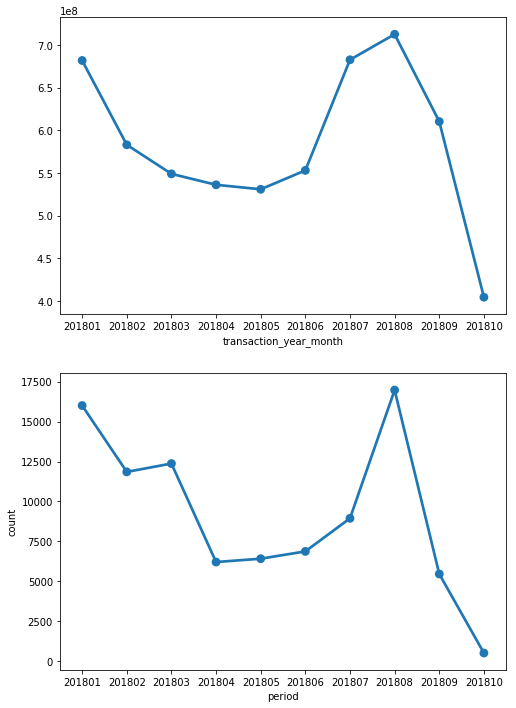

In [38]:
plt.figure(figsize = (8,12))

plt.subplot(211)
sns.pointplot(x = temp.index, y = temp.values)

plt.subplot(212)
sns.pointplot(x = 'period', y = 'count', data = count)
plt.show()

2018년 뽑을 때, 최대한 같은 월에 있는 것을 뽑아야겠군 // 거래량과의 상관관계 파악하자

## 거래량과의 상관 관계
### 1. apartment_id 거래량 ~ 거래 금액 평균

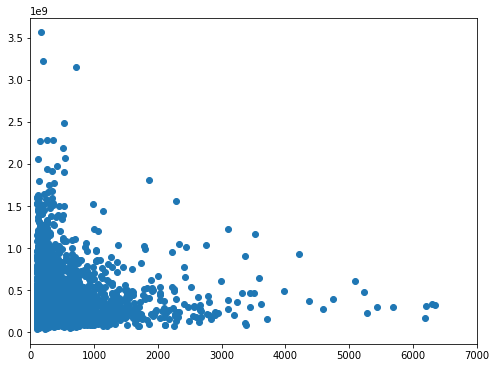

In [39]:
grby = TRAIN.groupby(by = 'apartment_id').agg('mean')
grby = grby['transaction_real_price'].reset_index()
grby.columns = ['apartment_id', 'mean_price']

count = pd.value_counts(TRAIN['apartment_id']).reset_index()
count.columns = ['apartment_id', 'count']
count = count.sort_values(by = 'apartment_id').reset_index(drop = True)

grby['count'] = count['count']
temp = grby[grby['count'] > 100].sort_values(by = 'count')


plt.figure(figsize = (8, 6))
plt.scatter(x = temp['count'], y =temp['mean_price'])
plt.xlim(0, 7000)
plt.show()

In [40]:
print('pearson : ', pearsonr(x=temp['count'], y=temp['mean_price']))
print('spearman : ', spearmanr(a=temp['count'], b=temp['mean_price']))

pearson :  (-0.009639998845194392, 0.5884984674041198)
spearman :  SpearmanrResult(correlation=-0.007804971434597636, pvalue=0.6613682755945782)


apartment 거래량과 가격 간의 상관관계는 없음

### 2. transaction_year_month 거래량 ~ 거래 금액 평균

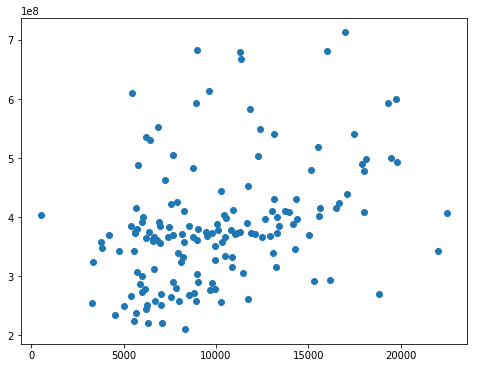

In [41]:
grby = TRAIN.groupby(by = 'transaction_year_month').agg('mean')
grby = grby['transaction_real_price'].reset_index()
grby.columns = ['transaction_year_month', 'mean_price']

count = pd.value_counts(TRAIN['transaction_year_month']).reset_index()
count.columns = ['transaction_year_month', 'count']
count = count.sort_values(by = 'transaction_year_month').reset_index(drop = True)

grby['count'] = count['count']

plt.figure(figsize = (8, 6))
plt.scatter(x = grby['count'], y = grby['mean_price'])
plt.show()

In [42]:
print('pearson : ', pearsonr(x=grby['count'], y=grby['mean_price']))
print('spearman : ', spearmanr(a=grby['count'], b=grby['mean_price']))

pearson :  (0.37315188722494896, 1.8766929889800378e-06)
spearman :  SpearmanrResult(correlation=0.40870893812070286, pvalue=1.422725526005189e-07)


기간별 거래량과 평균 가격에는 상관 계수가 있습니다.

## Test Set과 가장 가까운 Train set 찾아보자
미래의 값을 feature로 쓸 수 있는지 ??!

In [43]:
TEST.tail(10)

,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,address_by_law,total_parking_capacity_in_site,total_household_count_in_sites,apartment_building_count_in_sites,tallest_building_in_sites,lowest_building_in_sites,heat_type,heat_fuel,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price,log_target
3908,1605364,24,0,201810,21~31,1992,84.9450,13,35.160082,129.022599,2623011100,471.0,450,3,20.0,15.0,individual,gas,25512,103.74,370,3.0,2.0,stairway,0,0.0
3909,1605365,1573,0,201810,21~31,1994,57.0900,16,35.070982,129.062594,2620012100,800.0,1000,9,21.0,19.0,individual,gas,146937,78.30,600,3.0,1.0,corridor,0,0.0
3910,1605367,3686,1,201810,21~31,1996,59.3400,4,37.555215,127.131294,1174010700,111.0,107,1,19.0,11.0,individual,gas,165821,88.47,53,3.0,1.0,corridor,0,0.0
3911,1605368,137,1,201810,21~31,1998,59.9600,1,37.468249,126.944284,1162010200,141.0,126,1,16.0,7.0,individual,gas,25593,85.25,60,2.0,1.0,corridor,0,0.0
3912,1605369,5454,1,201810,21~31,1987,63.5300,8,37.589432,126.907550,1138010900,570.0,570,5,15.0,15.0,individual,gas,8736,85.76,315,2.0,1.0,corridor,0,0.0
3913,1605370,2871,1,201810,21~31,1987,31.9800,4,37.652529,127.064082,1135010500,-999.0,840,19,5.0,5.0,individual,gas,6038,37.38,840,1.0,1.0,stairway,0,0.0
3914,1605371,6002,1,201810,21~31,2004,84.8900,25,37.621150,127.010829,1130510100,1875.0,2075,21,25.0,5.0,individual,gas,9468,102.49,648,3.0,2.0,stairway,0,0.0
3915,1605372,7116,1,201810,21~31,1994,57.4600,15,37.643436,127.017889,1130510300,130.0,146,1,15.0,12.0,individual,gas,35853,71.47,29,3.0,1.0,stairway,0,0.0
3916,1605374,2937,1,201810,21~31,1999,84.8800,5,37.604326,127.017168,1129013300,802.0,860,8,22.0,7.0,individual,gas,6280,108.75,0,3.0,2.0,stairway,0,0.0
3917,1605375,20307,0,201810,21~31,2011,84.7808,4,35.338713,129.163924,2671025627,1128.0,978,13,20.0,18.0,district,cogeneration,54538,105.99,430,3.0,2.0,stairway,0,0.0


In [44]:
TRAIN[TRAIN['apartment_id'] == 2937]

,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,address_by_law,total_parking_capacity_in_site,total_household_count_in_sites,apartment_building_count_in_sites,tallest_building_in_sites,lowest_building_in_sites,heat_type,heat_fuel,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price,log_target
292,292,2937,1,200601,11~20,1999,50.45,4,37.604326,127.017168,1129013300,802.0,860,8,22.0,7.0,individual,gas,6284,72.41,81,2.0,1.0,corridor,135000000,18.720785
301,301,2937,1,200601,11~20,1999,59.59,4,37.604326,127.017168,1129013300,802.0,860,8,22.0,7.0,individual,gas,6285,81.00,275,3.0,1.0,corridor,157500000,18.874936
2917,2917,2937,1,200601,1~10,1999,59.59,13,37.604326,127.017168,1129013300,802.0,860,8,22.0,7.0,individual,gas,6285,81.00,275,3.0,1.0,corridor,159000000,18.884415
4486,4486,2937,1,200601,21~31,1999,114.63,4,37.604326,127.017168,1129013300,802.0,860,8,22.0,7.0,individual,gas,6282,141.49,192,4.0,2.0,stairway,280000000,19.450300
7171,7171,2937,1,200602,11~20,1999,59.59,18,37.604326,127.017168,1129013300,802.0,860,8,22.0,7.0,individual,gas,6285,81.00,275,3.0,1.0,corridor,156000000,18.865367
7182,7182,2937,1,200602,11~20,1999,59.59,4,37.604326,127.017168,1129013300,802.0,860,8,22.0,7.0,individual,gas,6285,81.00,275,3.0,1.0,corridor,158000000,18.878106
10680,10680,2937,1,200602,1~10,1999,59.59,20,37.604326,127.017168,1129013300,802.0,860,8,22.0,7.0,individual,gas,6285,81.00,275,3.0,1.0,corridor,157500000,18.874936
10695,10695,2937,1,200602,1~10,1999,59.59,12,37.604326,127.017168,1129013300,802.0,860,8,22.0,7.0,individual,gas,6285,81.00,275,3.0,1.0,corridor,158000000,18.878106
13852,13852,2937,1,200602,21~28,1999,84.88,4,37.604326,127.017168,1129013300,802.0,860,8,22.0,7.0,individual,gas,6279,108.75,209,3.0,2.0,stairway,220000000,19.209138
13853,13853,2937,1,200602,21~28,1999,84.88,4,37.604326,127.017168,1129013300,802.0,860,8,22.0,7.0,individual,gas,6280,108.75,0,3.0,2.0,stairway,220000000,19.209138


train과 test 아예 똑같은 경우도 있음 ex)20307<br/>
test 셋과 train 셋 row가 완전히 같은 경우가 있나 ?

In [45]:
def is_there_same_row_of_a_in_b(a, b):
    temp_a = a[:, 1:-2]
    temp_a = temp_a.tolist()
    
    ret = {'a' : [], 'b' : []}
    
    i = 1
    for item_a in temp_a:
        ret['a'].append(item_a[0])
        temp_b = b[b['apartment_id'] == item_a[0]].values.tolist()
        temp = 0
        for item_b in temp_b:
            if item_a == item_b[1:-2]:
                temp = item_b[0]
                break
        ret['b'].append(temp)
            
    return pd.DataFrame(ret)

In [46]:
temp = is_there_same_row_of_a_in_b(TEST.values, TRAIN)

In [47]:
temp[temp['b'] > 0]#.to_csv('data/same_instance.csv', encoding = False, index = False)

In [48]:
TRAIN[TRAIN['key'] == 1549697]

,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,address_by_law,total_parking_capacity_in_site,total_household_count_in_sites,apartment_building_count_in_sites,tallest_building_in_sites,lowest_building_in_sites,heat_type,heat_fuel,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price,log_target
1549523,1549697,5714,0,201804,11~20,1995,59.58,5,35.226419,129.163046,2635010100,64.0,126,1,14.0,14.0,individual,gas,33874,80.22,126,2.0,1.0,corridor,120000000,18.603002


In [49]:
TEST[TEST['apartment_id'] == 5714]

,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,address_by_law,total_parking_capacity_in_site,total_household_count_in_sites,apartment_building_count_in_sites,tallest_building_in_sites,lowest_building_in_sites,heat_type,heat_fuel,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price,log_target
175,1550070,5714,0,201804,11~20,1995,59.58,5,35.226419,129.163046,2635010100,64.0,126,1,14.0,14.0,individual,gas,33874,80.22,126,2.0,1.0,corridor,0,0.0


총 56가지 경우가 있었으며, 예시는 위와 같다.<br/>
같은 row에 대해서 같은 price를 적어주는 것이 알맞는가를 알아보기 위해 train에 대해서도 진행해보자

In [50]:
def is_there_same_row_of_a_in_b(a, b):
    temp_a = a[:, 1:-1]
    temp_a = temp_a.tolist()
    
    ret = {'a' : [], 'b' : []}
    
    i = 1
    for item_a in temp_a:
        ret['a'].append(item_a[0])
        temp_b = b[b['apartment_id'] == item_a[0]].values.tolist()
        temp = []
        for item_b in temp_b:
            if item_a == item_b[1:-1]:
                temp.append(item_b[0])
        ret['b'].append(temp)
            
    return pd.DataFrame(ret)

In [51]:
temp = is_there_same_row_of_a_in_b(TRAIN.drop_duplicates(subset = ['apartment_id']).values, TRAIN)

In [52]:
temp[temp['b'].map(lambda x:len(x)) > 2]

,a,b


In [53]:
TRAIN[(TRAIN['key'] == 1575600) | (TRAIN['key'] == 1575913) | (TRAIN['key'] == 1578892)]

,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,address_by_law,total_parking_capacity_in_site,total_household_count_in_sites,apartment_building_count_in_sites,tallest_building_in_sites,lowest_building_in_sites,heat_type,heat_fuel,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price,log_target
1575086,1575600,38448,0,201807,21~31,2018,63.7565,5,35.099289,129.023941,2614011200,542.0,452,2,49.0,49.0,individual,gas,161888,89.99,46,3.0,2.0,stairway,315500000,19.569669
1575395,1575913,38448,0,201807,21~31,2018,63.7565,5,35.099289,129.023941,2614011200,542.0,452,2,49.0,49.0,individual,gas,161888,89.99,46,3.0,2.0,stairway,315800000,19.570620


In [54]:
TRAIN[(TRAIN['key'] == 229) | (TRAIN['key'] == 234) | (TRAIN['key'] == 236)]

,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,address_by_law,total_parking_capacity_in_site,total_household_count_in_sites,apartment_building_count_in_sites,tallest_building_in_sites,lowest_building_in_sites,heat_type,heat_fuel,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price,log_target
229,229,12037,1,200601,11~20,2005,84.97,1,37.568529,127.071547,1123010600,237.0,193,3,15.0,10.0,individual,gas,45259,107.09,152,3.0,2.0,stairway,274700000,19.43119


In [55]:
TRAIN[(TRAIN['key'] == 743439) | (TRAIN['key'] ==743499) | (TRAIN['key'] == 743514)]

,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,address_by_law,total_parking_capacity_in_site,total_household_count_in_sites,apartment_building_count_in_sites,tallest_building_in_sites,lowest_building_in_sites,heat_type,heat_fuel,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price,log_target
743438,743439,23976,1,201302,11~20,2012,114.71,5,37.463607,127.019939,1165010300,105.0,178,10,7.0,7.0,individual,gas,57383,148.68,24,4.0,2.0,mixed,755210000,20.442506
743513,743514,23976,1,201302,11~20,2012,114.71,5,37.463607,127.019939,1165010300,105.0,178,10,7.0,7.0,individual,gas,57383,148.68,24,4.0,2.0,mixed,736980000,20.418071


In [56]:
TRAIN[(TRAIN['key'] == 118561) | (TRAIN['key'] ==118585) | (TRAIN['key'] == 118610) | (TRAIN['key'] == 118636)]

,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,address_by_law,total_parking_capacity_in_site,total_household_count_in_sites,apartment_building_count_in_sites,tallest_building_in_sites,lowest_building_in_sites,heat_type,heat_fuel,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price,log_target
118561,118561,14281,0,200611,11~20,2006,135.7818,4,35.154999,129.034073,2623011000,505.0,299,5,29.0,14.0,individual,gas,46273,169.58,113,4.0,2.0,stairway,398640000,19.803569


예외가 없다고 말할 수는 없겠지만, 이 정도면 그냥 train 값 가져다 써도 될듯!<br/>
다음으로 테스트셋 각 row에 대하여 해당 월에 거래가 일어난적 있는지 확인을 해보자

In [57]:
def is_there_same_transaction_date_of_a_in_b(a, b):
    '''
    a :  pandas dataframe, test dataset
    b : pandas dataframe, train dataset
    '''
    ret = {'a' : [], 'b': [] }
    for apt_id, date in zip(a['apartment_id'], a['transaction_year_month']):
        ret['a'].append(apt_id)
        temp_b = b[b['apartment_id'] == apt_id].tail(1).values
        temp = 0
        if temp_b.shape[0] > 0 :
            if temp_b[0,3] == date:
                temp = temp_b[0,0]
        ret['b'].append(temp)
    return pd.DataFrame(ret)         

In [58]:
temp = is_there_same_transaction_date_of_a_in_b(TEST, TRAIN)

In [59]:
temp[temp['b'] > 0]

,a,b
1,14029,764017
3,22241,845096
4,316,856337
6,18263,1037011
9,710,1204145
11,3581,1366757
12,11908,1375477
14,36531,1394465
17,3542,1419441
18,3418,1422396


In [60]:
TRAIN['transaction_year'] = TRAIN['transaction_year_month'].astype(str).map(lambda x: int(x[0:4]))
TRAIN['transaction_month'] = TRAIN['transaction_year_month'].astype(str).map(lambda x: int(x[4:6]))
TEST['transaction_year'] = TEST['transaction_year_month'].astype(str).map(lambda x: int(x[0:4]))
TEST['transaction_month'] = TEST['transaction_year_month'].astype(str).map(lambda x: int(x[4:6]))

In [61]:
def is_there_same_transaction_year_of_a_in_b(a, b):
    '''
    a :  pandas dataframe, test dataset
    b : pandas dataframe, train dataset
    '''
    ret = {'a' : [], 'b': [] }
    for apt_id, year in zip(a['apartment_id'], a['transaction_year']):
        ret['a'].append(apt_id)
        temp_b = b[b['apartment_id'] == apt_id].tail(1).values
        temp = 0
        if temp_b.shape[0] > 0 :
            if temp_b[0,-2] == year:
                temp = temp_b[0,0]
        ret['b'].append(temp)
    return pd.DataFrame(ret)

def is_there_same_transaction_year_of_a_in_b2(a, b):
    '''
    a :  pandas dataframe, test dataset
    b : pandas dataframe, train dataset
    '''
    ret = {'a' : [], 'b': [] }
    for apt_id, room_id, year in zip(a['apartment_id'], a['room_id'], a['transaction_year']):
        ret['a'].append(apt_id)
        temp_b = b[b['room_id'] == room_id].tail(1).values
        temp = 0
        if temp_b.shape[0] > 0 :
            if temp_b[0,-2] == year:
                temp = temp_b[0,0]
        ret['b'].append(temp)
    return pd.DataFrame(ret)

def is_there_same_transaction_year_of_a_in_b3(a, b):
    '''
    a :  pandas dataframe, test dataset
    b : pandas dataframe, train dataset
    '''
    ret = {'a' : [], 'b': [] }
    for apt_id, room_id, year in zip(a['apartment_id'], a['room_id'], a['transaction_year']):
        ret['a'].append(apt_id)
        temp_b = b[b['room_id'] == room_id].tail(1).values
        temp = 0
        if temp_b.shape[0] > 0 :
            temp = temp_b[0,0]
        ret['b'].append(temp)
    return pd.DataFrame(ret)         

def is_there_same_transaction_year_of_a_in_b4(a, b):
    '''
    a :  pandas dataframe, test dataset
    b : pandas dataframe, train dataset
    '''
    ret = {'a' : [], 'b': [] }
    for apt_id in a['apartment_id']:
        ret['a'].append(apt_id)
        temp_b = b[b['apartment_id'] == apt_id].tail(1).values
        temp = 0
        if temp_b.shape[0] > 0 :
            temp = temp_b[0,0]
        ret['b'].append(temp)
    return pd.DataFrame(ret)         

In [62]:
temp = is_there_same_transaction_year_of_a_in_b(TEST, TRAIN)
temp2 = is_there_same_transaction_year_of_a_in_b2(TEST, TRAIN)

val_key = pd.merge(left = temp, right = temp2, on='a', how = 'left')
val_key.columns = ['apartment_id', '2nd', '1st']
val_key[(val_key['2nd'] == 0) & (val_key['1st'] == 0)]

temp = is_there_same_transaction_year_of_a_in_b3(TEST, TRAIN)

val_key.columns = ['a', '2nd', '1st']
val_key = pd.merge(left = val_key, right = temp, on='a', how = 'left')
val_key.columns = ['apartment_id', '2nd', '1st', '3rd']

temp = is_there_same_transaction_year_of_a_in_b4(TEST, TRAIN)

val_key.columns = ['a', '2nd', '1st', '3rd']
val_key = pd.merge(left = val_key, right = temp, on='a', how = 'left')
val_key.columns = ['apartment_id', '2nd', '1st', '3rd', '4th']

In [63]:
ret = []
for i, row in val_key.iterrows():
    key = -1
    if row['1st'] != 0:
        key = row['1st']
    elif row['2nd'] != 0:
        key = row['2nd']
    elif row['3rd'] != 0:
        key = row['3rd']
    else :
        key = row['4th']
    ret.append(key)
    
val_key['val_key'] = ret
# val_key.to_csv("val_key.csv", encoding = False, index = False)

## room_id 탐색
가정 : **`aparment_id`** x **`supply area`** 의 조합이 **`room_id`** 일 것이다.

In [64]:
apartment_list = pd.value_counts(TRAIN['apartment_id']).index.tolist()

ret = {'id':[],'room':[], 'supply_area':[]}
for apartment_id in apartment_list:
    ret['id'].append(apartment_id)
    temp = TRAIN[TRAIN['apartment_id'] == apartment_id].nunique()
    ret['room'].append(temp['room_id'])
    ret['supply_area'].append(temp['supply_area'])
    
ret = pd.DataFrame(ret)

In [65]:
ret[ret['room'] != ret['supply_area']]

,id,room,supply_area
0,16156,22,19
6,1284,4,2
7,17001,13,7
9,15985,10,4
12,5280,7,5
13,16629,10,9
15,1066,7,6
17,15953,13,11
18,8702,16,12
20,3735,5,4


In [66]:
ret[ret['room'] < ret['supply_area']]

,id,room,supply_area


In [67]:
ret['diff'] = ret['room'] - ret['supply_area']
ret['bool'] = np.ceil(ret['diff']/(ret['diff']+1))
ret.sort_values(by = 'diff', ascending = False)

,id,room,supply_area,diff,bool
1067,184,27,5,22,1.0
846,24774,33,14,19,1.0
1608,18732,25,11,14,1.0
3586,36651,15,2,13,1.0
415,361,16,8,8,1.0
1549,33324,12,5,7,1.0
168,365,14,7,7,1.0
542,22598,20,13,7,1.0
2569,19496,16,10,6,1.0
7,17001,13,7,6,1.0


In [68]:
pd.value_counts(ret['bool'])

0.0    3450
1.0     456
Name: bool, dtype: int64

In [69]:
TRAIN[TRAIN['apartment_id'] == 280].nunique()

key                                   454
apartment_id                            1
city                                    1
transaction_year_month                 34
transaction_date                        4
year_of_completion                      1
exclusive_use_area                      1
floor                                  15
latitude                                1
longitude                               1
address_by_law                          1
total_parking_capacity_in_site          1
total_household_count_in_sites          1
apartment_building_count_in_sites       1
tallest_building_in_sites               1
lowest_building_in_sites                1
heat_type                               1
heat_fuel                               1
room_id                                 7
supply_area                             1
total_household_count_of_area_type      4
room_count                              1
bathroom_count                          1
front_door_structure              

In [70]:
TRAIN[TRAIN['apartment_id'] == 280]

,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,address_by_law,total_parking_capacity_in_site,total_household_count_in_sites,apartment_building_count_in_sites,tallest_building_in_sites,lowest_building_in_sites,heat_type,heat_fuel,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price,log_target,transaction_year,transaction_month
864986,864991,280,1,201402,11~20,1992,110.2,15,37.524763,127.056116,1168010400,216.0,177,1,15.0,12.0,individual,gas,25698,136.11,12,4.0,2.0,stairway,1395000000,21.056160,2014,2
864987,864992,280,1,201402,11~20,1992,110.2,15,37.524763,127.056116,1168010400,216.0,177,1,15.0,12.0,individual,gas,25699,136.11,15,4.0,2.0,stairway,1395000000,21.056160,2014,2
864988,864993,280,1,201402,11~20,1992,110.2,15,37.524763,127.056116,1168010400,216.0,177,1,15.0,12.0,individual,gas,25700,136.11,12,4.0,2.0,stairway,1395000000,21.056160,2014,2
864989,864994,280,1,201402,11~20,1992,110.2,15,37.524763,127.056116,1168010400,216.0,177,1,15.0,12.0,individual,gas,25701,136.11,75,4.0,2.0,stairway,1395000000,21.056160,2014,2
864990,864995,280,1,201402,11~20,1992,110.2,15,37.524763,127.056116,1168010400,216.0,177,1,15.0,12.0,individual,gas,25702,136.11,36,4.0,2.0,stairway,1395000000,21.056160,2014,2
864991,864996,280,1,201402,11~20,1992,110.2,15,37.524763,127.056116,1168010400,216.0,177,1,15.0,12.0,individual,gas,25703,136.11,15,4.0,2.0,stairway,1395000000,21.056160,2014,2
864992,864997,280,1,201402,11~20,1992,110.2,15,37.524763,127.056116,1168010400,216.0,177,1,15.0,12.0,individual,gas,25704,136.11,12,4.0,2.0,stairway,1395000000,21.056160,2014,2
869940,869945,280,1,201402,1~10,1992,110.2,7,37.524763,127.056116,1168010400,216.0,177,1,15.0,12.0,individual,gas,25698,136.11,12,4.0,2.0,stairway,1215000000,20.918010,2014,2
869941,869946,280,1,201402,1~10,1992,110.2,7,37.524763,127.056116,1168010400,216.0,177,1,15.0,12.0,individual,gas,25699,136.11,15,4.0,2.0,stairway,1215000000,20.918010,2014,2
869942,869947,280,1,201402,1~10,1992,110.2,7,37.524763,127.056116,1168010400,216.0,177,1,15.0,12.0,individual,gas,25700,136.11,12,4.0,2.0,stairway,1215000000,20.918010,2014,2


(위 코드) 각 **`apartment_id`** 마다 **`supply_area`** 의 개수와 **`room_id`** 의 개수가 같은지 확인

In [71]:
# room_list = pd.value_counts(TRAIN['room_id']).index.tolist()

# ret2 = {'id':[],'bool':[]}
# for room_id in room_list:
#     ret2['id'].append(room_id)
#     switch = True
#     temp = TRAIN[TRAIN['room_id'] == room_id].nunique()
#     if temp['apartment_id'] != 1:
#         switch = False
#     ret2['bool'].append(switch)
    
# ret2 = pd.DataFrame(ret2)

In [72]:
# False in ret2['bool'].tolist()

(위 코드) 각각의 **`room_id`** 가 서로 다른 **`apartment_id`** 가질 수 있는지?<br/>
만약 다른 경우 주로 연속된 거래에 **`room_id`** 만 다른 형태로 등장